# **TTI109 - Estatística**
# **Aula 16 - Teste de Hipótese para a Média 01**

Nessa aula vamos aprender a:

* Determinar o valor $p$ em um teste de hipótese, dependendo do tipo de teste (unilateral à esquerda, unilateral à direita ou bilateral);
* Aplicar a regra de decisão para um teste de hipótese a partir do valor $p$;
* Construir e avaliar um teste de hipótese sobre a média populacional $\mu$ de uma distribuição, supondo que o desvio padrão populacional $\sigma$ seja conhecido.

# Construindo uma função para o teste de hipótese da média ($\sigma$ conhecido)

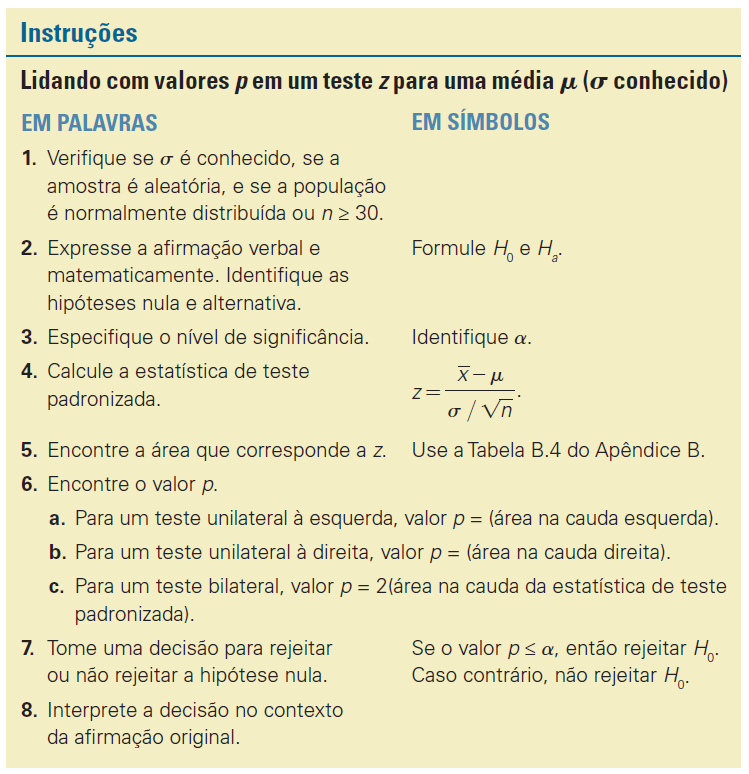

In [1]:
def TH_media_z(x_barra=None, n_amostras=None, mu=None,
               sigma=None, alpha=0.05, teste='esquerda', conclusao=True):
  '''Função para teste de hipótese da média populacional mu, com nível de
  significância alpha, supondo desvio padrão populacional sigma conhecido.
  ENTRADA:
  - x_barra: média amostral
  - n_amostras: número de amostras coletadas no experimento
  - mu: hipótese nula para a média populacional
  - sigma: desvio padrão populacional
  - alpha: nível de significância adotado no teste (valor default 0.05)
  - teste: string que identifica o tipo de teste a ser realizado: 'esquerda'
  para teste unilateral à esquerda, 'direita', para teste unilateral à direita
  e 'bilateral' para teste bilateral (valor default 'esquerda')
  - conclusao: flag para ativação do relatório de conclusão do teste de hipótese
  (valor default=True)
  SAíDA:
  - relatório de conclusão do teste de hipótese, caso cocnlusao=True
  - p_valor: valor p do teste de hipótese'''

  from scipy import stats as st

  # Criação da distribuição amostral das médias
  dist_amostras = st.norm(loc=mu, scale=sigma/n_amostras**0.5)

  # Cálculo do p-valor, de acordo com o tipo de teste
  if teste == 'esquerda':
    p_valor = dist_amostras.cdf(x_barra)
    tipo = 'unilateral à esquerda'
  elif teste == 'direita':
    p_valor = dist_amostras.sf(x_barra)
    tipo = 'unilateral à direita'
  elif teste == 'bilateral':
    p_valor =  2*dist_amostras.cdf(x_barra)
    tipo = 'bilateral'

  # Relatório de conclusão do teste de hipótese
  if conclusao:
    print('*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***')
    print(f'Teste {tipo} com p-valor = {p_valor:.6f}')
    if p_valor <= alpha:
      print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
    else:
      print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
  return p_valor

# Exercício 01 - Teste unilateral à esquerda

Em corrida de carros, o *pit stop* é aonde um veículo vai para trocar pneus, abastecer, efetuar reparos e outros ajustes mecânicos. A eficiência de uma equipe que realiza esses ajustes pode afetar o resultado de uma corrida.

Uma equipe afirma que seu tempo médio no *pit stop* (para 4 trocas de pneus e abastecimento) é menor que 13 segundos. Uma amostra aleatória de 32 tempos de *pit stop* tem uma média amostral de 12,9 segundos. Suponha que o desvio padrão populacional é de 0,19
segundos. Há evidência suficiente para concordar com a afirmação para $\alpha = 0,01$? Use um valor $p$.

In [ ]:
''' Construção do teste de hipótese:
H0: mu >= 13 segundos
Ha: mu < 13 segundos (afirmação)
Tipo: unilateral à esquerda'''

In [2]:
# Uso da função TH_media_z
p_valor = TH_media_z(x_barra=12.9, n_amostras=32, mu=13, sigma=0.19,
                     alpha=0.01, teste='esquerda', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste unilateral à esquerda com p-valor = 0.001454
Hipótese nula rejeitada ao nível de significância 1.0%


In [ ]:
'''Conclusão: Há evidências estatísticas suficientes para corroborar a afirmação
de que os pit-stops duram menos de 13 segundos.'''

### Emulando um conjunto de dados para uso da função `ztest`

Vamos resolver o novamente o Exercício 01, agora criando um conjunto de dados aleatórios com características similares àquelas fornecidas no enunciado.

Nessa situação, o teste de hipótese da média populacional será realizado pela função `ztest` do módulo `statsmodels.stats.weightstats`.

In [3]:
# Bibliotecas
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest

In [8]:
# Caracterização da distribuição amostral das médias
media_pit = 12.9
std_pit = 0.19
amostras = 32
erro_padrao = std_pit/amostras**0.5

# Nível de significância do teste
alpha = 0.01

# Média populacional a ser testada
mu = 13

In [15]:
# Criação do conjunto de dados aleatórios
data = std_pit*randn(amostras) + media_pit

# Verificação das características desejadas
print(f'Média amostral = {np.mean(data):.2f} segundos')
print(f'Desvio padrão amostral = {np.std(data):.5f} segundos')

Média amostral = 12.90 segundos
Desvio padrão amostral = 0.18028 segundos


In [10]:
# Teste de hipótese usando ztest
z_score, p_valor= ztest(x1=data, x2=None, value=mu, alternative='smaller')
print(f'Estatística padronizada: z = {z_score:.5f}')
print(f'Valor p do teste de hipótese = {p_valor:.5f}')

Estatística padronizada: z = -4.00340
Valor p do teste de hipótese = 0.00003


In [11]:
# Conclusão do teste
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')

Hipótese nula rejeitada ao nível de significância 1.0%


# Exercício 02 - Teste unilateral à direita

Proprietários de casas afirmam que a velocidade média de veículos que passam por sua rua é maior que o limite de velocidade de 35 milhas por hora. Uma amostra aleatória de 100 automóveis tem uma média de
velocidade de 36 milhas por hora. Suponha que o desvio padrão populacional é de 4 milhas por hora. Há evidência suficiente para apoiar a afirmação para $\alpha = 0,05$? Use um valor $p$.

In [ ]:
''' Construção do teste de hipótese:
H0: mu <= 35 milhas por hora
Ha: mu > 35 milhas por hora (afirmação)
Tipo: unilateral à direita'''

In [12]:
# Uso da função TH_media_z
p_valor = TH_media_z(x_barra=36, n_amostras=100, mu=35, sigma=4,
                     alpha=0.05, teste='direita', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste unilateral à direita com p-valor = 0.006210
Hipótese nula rejeitada ao nível de significância 5.0%


In [ ]:
'''Conclusão: Há evidências estatísticas suficientes para corroborar a afirmação
de que a velocidade média dos veículos é superior a 35 milhas por hora.'''

### Emulando um conjunto de dados para uso da função `ztest`

Vamos resolver o novamente o Exercício 02, agora criando um conjunto de dados aleatórios com características similares àquelas fornecidas no enunciado.

Nessa situação, o teste de hipótese da média populacional será realizado pela função `ztest` do módulo `statsmodels.stats.weightstats`.

In [17]:
# Caracterização da distribuição amostral das médias
media_vel = 36
std_vel = 4
amostras = 100
erro_padrao = std_vel/amostras**0.5

# Nível de significância do teste
alpha = 0.05

# Média populacional a ser testada
mu = 35

In [18]:
# Criação do conjunto de dados aleatórios
data = std_vel*randn(amostras) + media_vel

# Verificação das características desejadas
print(f'Média amostral = {np.mean(data):.2f} mi/h')
print(f'Desvio padrão amostral= {np.std(data):.5f} mi/h')

Média amostral = 35.72 mi/h
Desvio padrão amostral= 4.10183 mi/h


In [19]:
# Teste de hipótese usando ztest
z_score, p_valor= ztest(x1=data, x2=None, value=mu, alternative='larger')
print(f'Estatística padronizada: z = {z_score:.5f}')
print(f'Valor p do teste de hipótese = {p_valor:.5f}')

Estatística padronizada: z = 1.75114
Valor p do teste de hipótese = 0.03996


In [20]:
# Conclusão do teste
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')

Hipótese nula rejeitada ao nível de significância 5.0%


# Exercício 03 - Teste bilateral

De acordo com um estudo, o custo médio de uma cirurgia bariátrica (perda de peso) é de US$\$$ 21.500. Você acha que essa informação está incorreta e então seleciona aleatoriamente 25 pacientes que realizaram a cirurgia e descobre que o custo médio de suas cirurgias é de US$\$$ 20.695.

De estudos anteriores, o desvio padrão populacional é conhecido, US$\$$ 2.250, e a população é normalmente distribuída. Há evidência suficiente para concordar com a afirmação para $\alpha = 0,05$? Use um valor
$p$ (Adaptado de: *The American Journal of Managed Care*).

In [ ]:
''' Construção do teste de hipótese:
H0: mu = 21500 dólares (afirmação)
Ha: mu != 21500 dólares
Tipo: bilateral'''

In [21]:
# Uso da função TH_media_z
p_valor = TH_media_z(x_barra=20695, n_amostras=25, mu=21500, sigma=2250,
                     alpha=0.05, teste='bilateral', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste bilateral com p-valor = 0.073633
Hipótese nula NÃO rejeitada ao nível de significância 5.0%


In [ ]:
'''Conclusão: Não há evidências estatísticas suficientes para refutar a afirmação
de que o preço média da cirurgia bariátrica é de US$ 21.500,00.'''

### Emulando um conjunto de dados para uso da função `ztest`

Vamos resolver o novamente o Exercício 03, agora criando um conjunto de dados aleatórios com características similares àquelas fornecidas no enunciado.

Nessa situação, o teste de hipótese da média populacional será realizado pela função `ztest` do módulo `statsmodels.stats.weightstats`.

In [22]:
# Caracterização da distribuição amostral das médias
media_cirurgia = 20695
std_cirurgia = 2250
amostras = 25
erro_padrao = std_cirurgia/amostras**0.5

# Nível de significância do teste
alpha = 0.05

# Média populacional a ser testada
mu = 21500

In [25]:
# Criação do conjunto de dados aleatórios
data = std_cirurgia*randn(amostras) + media_cirurgia

# Verificação das características desejadas
print(f'Média amostral = {np.mean(data):.2f} dólares')
print(f'Desvio padrão amostral = {np.std(data):.5f} dólares')

Média amostral = 21020.26 dólares
Desvio padrão amostral = 2439.46014 dólares


In [26]:
# Teste de hipótese usando ztest
z_score, p_valor= ztest(x1=data, x2=None, value=mu, alternative='two-sided')
print(f'Estatística padronizada: z = {z_score:.5f}')
print(f'Valor p do teste de hipótese = {p_valor:.5f}')

Estatística padronizada: z = -0.96341
Valor p do teste de hipótese = 0.33534


In [27]:
# Conclusão do teste
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')

Hipótese nula NÃO rejeitada ao nível de significância 5.0%


# Exercício 04 - Usando conjunto de dados

O arquivo `bp.txt` registra os batimentos por minuto de uma amostra de pacientes (retirada de um contingente bem maior) antes e depois do consumo de um novo medicamento sob teste. Ao nível de significância de 5%, investigue a afirmação:

"O valor médio dos batimentos cardíacos por minuto de todos os participantes do estudo antes do consumo do novo medicamento é, no mínimo, de 146 batimentos".

In [28]:
# Download do conjunto de dados - arquivo bp.txt
%%capture
!gdown --id 1cWhFCT8oK--moMtD80laDoGcIy8d87-9

In [29]:
import pandas as pd
# Importando os dados do arquivo bp.txt
coracao = pd.read_csv('bp.txt', sep='\t')
# Checando as primeiras linhas dos dados
display(coracao.head())

,patient_name,patient_ sex,patient_agegrp,patient_bp_before,patient_bp_after
0,1,Male,30-45,142,153
1,2,Male,30-45,163,170
2,3,Male,30-45,143,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [ ]:
''' Construção do teste de hipótese:
H0: mu >= 146 bpm (afirmação)
Ha: mu < 146 bpm
Tipo: unilateral à esquerda'''

In [31]:
# Uso da função TH_media_z
p_valor = TH_media_z(x_barra=coracao['patient_bp_before'].mean(),
                     n_amostras=len(coracao['patient_bp_before']),
                     mu=146, sigma=coracao['patient_bp_before'].std(ddof=1),
                     alpha=0.05, teste='esquerda', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste unilateral à esquerda com p-valor = 1.000000
Hipótese nula NÃO rejeitada ao nível de significância 5.0%


In [ ]:
'''Conclusão: Não há evidências estatísticas suficientes para refutar a afirmação
de que o valor médio dos batimentos cardíacos por minuto dos participantes do
estudo antes do consumo do novo medicamento é, no mínimo, de 146 batimentos.'''

In [32]:
# Teste de hipótese usando a função ztest
z_score, p_valor = ztest(x1=coracao['patient_bp_before'], x2=None,
                         value=146, alternative='smaller')
print(f'Estatística padronizada: z = {z_score:.5f}')
print(f'Valor p do teste de hipótese = {p_valor:.5f}')

Estatística padronizada: z = 4.96027
Valor p do teste de hipótese = 1.00000


In [33]:
# Conclusão do teste
alpha = 0.05
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')

Hipótese nula NÃO rejeitada ao nível de significância 5.0%


# Exercício 05 - Usando conjunto de dados

*Níveis de dióxido de nitrogênio.* Um cientista estima que o nível médio de dióxido de nitrogênio em Calgary é maior que 32 partes por bilhão. Você quer testar essa estimativa. Para isso, você determina os níveis
de dióxido de nitrogênio em 34 dias selecionados aleatoriamente. Os resultados (em partes por bilhão) estão listados na tabela a seguir.

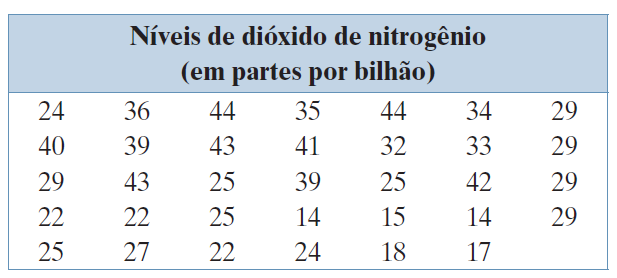

Suponha que o desvio
padrão populacional é de 9 partes por bilhão. Para o
nível de significância $\alpha = 0,06$, você pode concordar com a estimativa do cientista? (Adaptado de: *Clean Air Strategic Alliance*)

In [34]:
# Dados relativos aos níveis de dióxido de carbono
NO2 = pd.Series([24, 36, 44, 35, 44, 34, 29, 40, 39, 43, 41, 32, 33, 29,
                 29, 43, 25, 39, 25, 42, 29, 22, 22, 25, 14, 15, 14, 29,
                 25, 27, 22, 24, 18, 17])

In [ ]:
''' Construção do teste de hipótese:
H0: mu <= 32 ppb
Ha: mu > 32 ppb (afirmação)
Tipo: unilateral à direita'''

In [37]:
# Uso da função TH_media_z
p_valor = TH_media_z(x_barra=NO2.mean(), n_amostras=len(NO2),
                     mu=32, sigma=9, alpha=0.06, teste='direita', conclusao=True)

*** Teste de hipótese para a média populacional (desvio padrão conhecido) ***
Teste unilateral à direita com p-valor = 0.933886
Hipótese nula NÃO rejeitada ao nível de significância 6.0%


In [35]:
# Teste de hipótese usando a função ztest
z_score, p_valor = ztest(x1=NO2, x2=None, value=32, alternative='larger')
print(f'Estatística padronizada: z = {z_score:.5f}')
print(f'Valor p do teste de hipótese = {p_valor:.5f}')

Estatística padronizada: z = -1.47840
Valor p do teste de hipótese = 0.93035


In [36]:
# Conclusão do teste
alpha = 0.06
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')

Hipótese nula NÃO rejeitada ao nível de significância 6.0%
